**In this notebook we are load our preprocess data which we done in our previous part and now will train the model on different linear regression algorithms**



# Step 1: Import all the required libraries

- Pandas : In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis and storing in a proper way. In particular, it offers data structures and operations for manipulating numerical tables and time series
- Sklearn : Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn.
- Pickle : Python pickle module is used for serializing and de-serializing a Python object structure. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.
- Seaborn : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [1]:
# import all required libraries
import numpy as np
import pandas as pd
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import pandas as pd
import warnings
from sklearn import preprocessing
import seaborn as sns

warnings.filterwarnings('ignore')

In [2]:
# Read preprocess csv file
df = pd.read_csv('tip_df2.csv')

In [3]:
# Drop Unnamed: 0 column 
df = df.drop('Unnamed: 0',axis=1)

In [4]:
df

,total_bill,tip,size,Female,Male,No,Yes,Fri,Sat,Sun,Thur,Dinner,Lunch
0,16.99,1.01,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10.34,1.66,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,21.01,3.50,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,23.68,3.31,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24.59,3.61,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1188,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1189,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1190,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Step 2: Data Preparation
Goal:-

*Tasks we are going to in this step*

1. Now we spearate the target variable and feature columns in two different dataframe and will check the shape of the dataset for validation purpose.
2. Split dataset into train and test dataset
3. Scaling on train dataset





**1. Now we spearate the target variable and feature columns in two different dataframe and will check the shape of the dataset for validation purpose.**

In [5]:
# Spearate target and feature column in X and y variable
target = 'tip'   
X = df.drop(target, axis = 1) 
y = df[target]

In [6]:
# Check the shape of X and y variable
X.shape, y.shape

((1192, 12), (1192,))

In [7]:
# Reshape the y variable 
y = y.values.reshape(-1,1)

In [8]:
# Again check the shape of X and y variable
X.shape, y.shape

((1192, 12), (1192, 1))

# 2. Split dataset into train and test dataset
Here we are spliting our dataset into 80/20 percentage where 80% dataset goes into the training and 20% goes into testing the part.




In [9]:
# Split the X and y into X_train, X_test, y_train, y_test variables with 80-20% split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
X_train, X_test, y_train, y_test

(      total_bill  size  Female  Male   No  Yes  Fri  Sat  Sun  Thur  Dinner  \
 224          0.0   0.0     0.0   1.0  0.0  0.0  0.0  0.0  0.0   0.0     0.0   
 692          0.0   0.0     0.0   0.0  1.0  0.0  0.0  0.0  0.0   0.0     0.0   
 654          0.0   0.0     0.0   0.0  0.0  1.0  0.0  0.0  0.0   0.0     0.0   
 428          0.0   0.0     0.0   1.0  0.0  0.0  0.0  0.0  0.0   0.0     0.0   
 780          0.0   0.0     0.0   0.0  0.0  0.0  0.0  1.0  0.0   0.0     0.0   
 ...          ...   ...     ...   ...  ...  ...  ...  ...  ...   ...     ...   
 1044         0.0   0.0     0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0     1.0   
 1095         0.0   0.0     0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0     0.0   
 1130         0.0   0.0     0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0     1.0   
 860          0.0   0.0     0.0   0.0  0.0  0.0  0.0  0.0  1.0   0.0     0.0   
 1126         0.0   0.0     0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0     1.0   
 
       Lunch  
 224     0.0  
 692    

In [11]:
# Check shape of the splitted variables
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((953, 12), (239, 12), (953, 1), (239, 1))

In [12]:
X

,total_bill,size,Female,Male,No,Yes,Fri,Sat,Sun,Thur,Dinner,Lunch
0,16.99,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10.34,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,21.01,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,23.68,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24.59,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1187,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1188,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1189,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1190,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
y

array([[1.01],
       [1.66],
       [3.5 ],
       ...,
       [0.  ],
       [0.  ],
       [0.  ]])

# Step 3: Model Training

# Goal:- In this step we are going to train our dataset on different linear regression algorithms. As we know that our target variable is in continous format so we have to apply linear regression algoritms.

*Algorithms we are going to use in this step.*

1. Linear Regression (no regularization)
2. Lasso Regression (L1 regularization)
3. Ridge Regression (L2 regularization)
4. Principal Components Regression

**Define cross-validation folds**

The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset, for instance from a real problem).

In [14]:
# Define kfold with 10 split
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# (1) Linear Regression (no regularization)

Train set cross-validation

In [15]:
# define linear regression model object
l_reg = LassoCV()

In [16]:
# train or fit train dataset on linear regression model
l_train = l_reg.fit(X_train, y_train)


In [17]:
# Get R2 score
l_reg.score(X_train, y_train)

0.8970943155287093

In [18]:
# get kfold values
lr_scores = -1 * cross_val_score(l_reg, 
                                 X_train, 
                                 y_train, 
                                 cv=cv, 
                                 scoring='neg_root_mean_squared_error')
lr_scores

array([0.4362924 , 0.3163595 , 0.38137665, 0.55559698, 0.29772118,
       0.21179123, 0.40729242, 0.16417161, 0.43869406, 0.44073827])

In [19]:
# mean of the train kfold scores
lr_score_train = np.mean(lr_scores)
lr_score_train

0.3650034303501413

# **Predict**

In [20]:
# predict the values on X_test_scaled dataset 
y_predicted = l_reg.predict(X_test)



In [21]:
# RMSE between y_test and y_predicted values
lr_score_test = mean_squared_error(y_test, y_predicted, squared=False) # RMSE instead of MSE
lr_score_test

0.4386285487342184

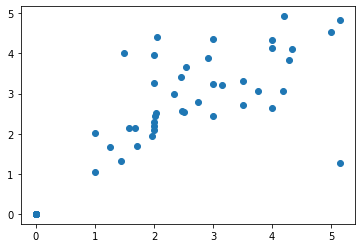

In [22]:
# scatter plot between y_test and y_predicted values
plt.scatter(y_test, y_predicted)
plt.show()

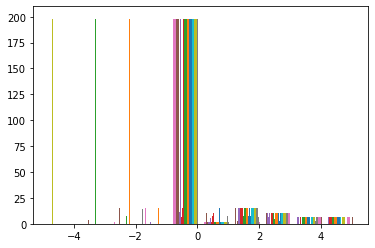

In [23]:
# histogram between y_test and y_predicted values
plt.hist(y_test - y_predicted)
plt.show()

# (2) Lasso Regression (L1 regularization)

Train set cross-validation


In [24]:
# define lasso regression model object
lasso_reg = LassoCV()

In [25]:
# train or fit train dataset on lasso regression model
lasso_reg = lasso_reg.fit(X_train, y_train)

In [26]:
# Get R2 score
lasso_reg.score(X_train, y_train)

0.8970943155287093

In [27]:
# get kfold values
lasso_scores = -1 * cross_val_score(lasso_reg, 
                                    X_train, 
                                    y_train, 
                                    cv=cv, 
                                    scoring='neg_root_mean_squared_error')
lasso_scores

array([0.4362924 , 0.3163595 , 0.38137665, 0.55559698, 0.29772118,
       0.21179123, 0.40729242, 0.16417161, 0.43869406, 0.44073827])

In [28]:
# mean of the train kfold scores
lasso_score_train = np.mean(lasso_scores)
lasso_score_train

0.3650034303501413

# Predict


In [29]:
# predict the values on X_test_scaled dataset 
y_predicted = lasso_reg.predict(X_test)

In [30]:
# RMSE between y_test and y_predicted values
lasso_score_test = mean_squared_error(y_test, y_predicted, squared=False)
lasso_score_test

0.4386285487342184

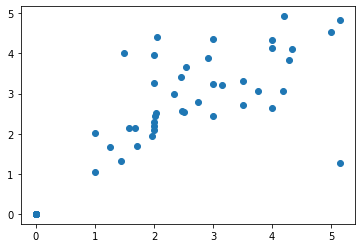

In [31]:
# scatter plot between y_test and y_predicted values
plt.scatter(y_test, y_predicted)
plt.show()

# (3) Ridge Regression (L2 regularization)

Train set cross-validation

In [32]:
# define Ridge regression model object
ridge_reg = RidgeCV()


In [33]:
# train or fit train dataset on linear regression model
ridge_reg = ridge_reg.fit(X_train, y_train)

In [34]:
# Get R2 score
ridge_reg.score(X_train, y_train)

0.901492458690001

In [35]:
# get kfold values
ridge_scores = -1 * cross_val_score(ridge_reg, 
                                    X_train, 
                                    y_train, 
                                    cv=cv, 
                                    scoring='neg_root_mean_squared_error')
ridge_scores


array([0.41997945, 0.35017946, 0.37107747, 0.55669208, 0.28916506,
       0.22352407, 0.3926226 , 0.16923069, 0.45267757, 0.4573016 ])

In [36]:
# mean of the train kfold scores
ridge_score_train = np.mean(ridge_scores)
ridge_score_train


0.36824500414753053

In [37]:
# predict the values on X_test_scaled dataset 
y_predicted = ridge_reg.predict(X_test)

In [38]:
# RMSE between y_test and y_predicted values
ridge_score_test = mean_squared_error(y_test, y_predicted, squared=False)
ridge_score_test

0.416994556089087

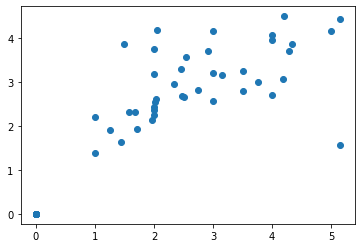

In [39]:
# scatter plot between y_test and y_predicted values
plt.scatter(y_test, y_predicted)
plt.show()

# Evaluation:

In [40]:
train_metrics = np.array([round(lr_score_train,3), 
                          round(lasso_score_train,3), 
                          round(ridge_score_train,3)]) 
train_metrics = pd.DataFrame(train_metrics, columns=['RMSE (Train Set)'])
train_metrics.index = ['Linear Regression', 
                       'Lasso Regression', 
                       'Ridge Regression']
train_metrics

,RMSE (Train Set)
Linear Regression,0.365
Lasso Regression,0.365
Ridge Regression,0.368


In [41]:
test_metrics = np.array([round(lr_score_test,3), 
                         round(lasso_score_test,3), 
                         round(ridge_score_test,3)]) 
test_metrics = pd.DataFrame(test_metrics, columns=['RMSE (Test Set)'])
test_metrics.index = ['Linear Regression', 
                      'Lasso Regression', 
                      'Ridge Regression']
test_metrics

,RMSE (Test Set)
Linear Regression,0.439
Lasso Regression,0.439
Ridge Regression,0.417


- A low RMSE value indicates that the simulated and observed data are close to each other showing a better accuracy. Thus lower the RMSE better is model performance.
- As You can see from above RMSE of, we will go with lasso or linear regression.
- But there is no universally “good” RMSE value. It all depends on the range of values in the dataset you’re working with.


# Step 4: Save Model
Goal:- In this step we are going to save our model in pickel format file.



In [77]:
import pickle
pickle.dump(lasso_reg, open('tip_amount_prediction.pkl', 'wb'))

In [78]:
import pickle

def model_prediction(features):
    
    pickled_model = pickle.load(open('tip_amount_prediction.pkl','rb'))
    Waiter_tip = str((list(pickled_model.predict(features))[0]))
    
    return str(f"The waiter's tip might be { Waiter_tip }")

In [87]:
X

,total_bill,size,Female,Male,No,Yes,Fri,Sat,Sun,Thur,Dinner,Lunch
0,16.99,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10.34,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,21.01,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,23.68,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24.59,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1187,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1188,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1189,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1190,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [85]:
# features or X_test
total_bill = 23.68
size = 2
Female = 0
Male = 0
No  = 0
Yes = 0
Fri = 0
Sat = 0
Sun = 0
Thur = 0
Dinner  = 0
Lunch = 0

In [86]:
model_prediction([[total_bill, size, Female, Male, No, Yes, Fri, Sat, Sun, Thur, Dinner, Lunch]])

"The waiter's tip might be 3.611391688611721"

In [ ]:
#total_bill ,size ,Female ,Male ,No, Yes, Fri, Sat ,Sun, Thur, Dinner, Lunch

In [88]:
df['size'].unique()

array([2., 3., 4., 1., 6., 5., 0.])